# Task

Sergei Mikhailovich Prokudin-Gorskii (1863-1944), a pioneering photographer extensively traveled the Russian Empire from 1909 to 1915, capturing thousands of images. Employing an early color technology, he recorded three images of each scene onto glass plates using red, green, and blue filters. 

Your task is to take Gorskii glass plate RGB color channels and produce a color image with as few visual artifacts as possible (ignore the artifacts at the image boundaries). To do this, you will need to read the image file, extract the three color channel images, place them on top of each other, and align them so that they form a single RGB color image. You will need to implement this in Python.

**Note** that the channel order for all files from top to bottom is BGR, not RGB!

In [2]:
!conda activate cv

In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.1/39.5 MB 193.2 kB/s eta 0:03:25
   ---------------------------------------- 0.1/39.5 MB 193.2 kB/s eta 0:03:25
   ---------------------------------------- 0.1/39.5 MB 193.2 kB/s eta 0:03:25
   ---------------------------------------- 0.2/39.5 MB 364.8 kB/s eta 0:01:48
   ---------------------------------------- 0.2/39.5 MB 364.8 kB/s eta 0:01:48
   ---------------------------------------- 0.2/39.5 MB 457.3 kB/s eta 0:01:26
 


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import cv2 as cv # Import OpenCV for image processing
from matplotlib import pyplot as plt # Import Matplotlib for displaying images
import numpy as np # Import NumPy for numerical operations


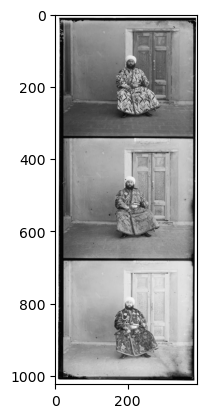

In [11]:
ausid = 12345 # use last five digits of your ausid, e.g 83452
if ausid % 3 == 0: filename = '00153v.jpg'
if ausid % 3 == 1: filename = '00149v.jpg'
if ausid % 3 == 2: filename = '00351v.jpg'

# Load the selected image in grayscale mode
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')


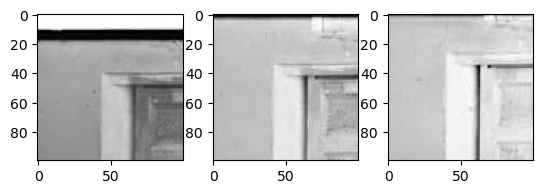

In [12]:
# Step 1 [5 points]: Read the image, extract the Blue, Green and Red channels, stack the channels and display using matplotlib
# TODO: YOUR CODE

# Get the height and width of the image
h,w = img.shape
# Divide the height by 3 to extract individual color channels
h = int(h/3)

b = img[0:h,:]
g = img[h:2*h,:]
r = img[2*h:3*h,:]

# Stack the separated channels into a single color image
stack = np.dstack((b,g,r))

# Display a cropped region (100x100 pixels) from each channel
plt.subplot(1,3,1)
plt.imshow(b[0:100, 150:250], cmap='gray')  
plt.subplot(1,3,2)
plt.imshow(g[0:100, 150:250], cmap='gray')  
plt.subplot(1,3,3)
plt.imshow(r[0:100, 150:250], cmap='gray')  

#opencv uses bgr
#matplotlib uses rgb


# When you display the image, you will notice that the color channels are not aligned properly. 

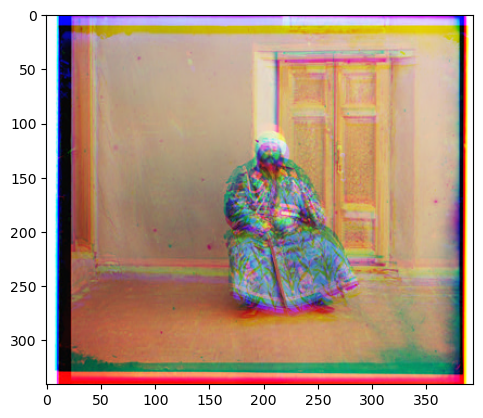

In [31]:
plt.figure()
plt.imshow(cv.cvtColor(stack, cv.COLOR_BGR2RGB))

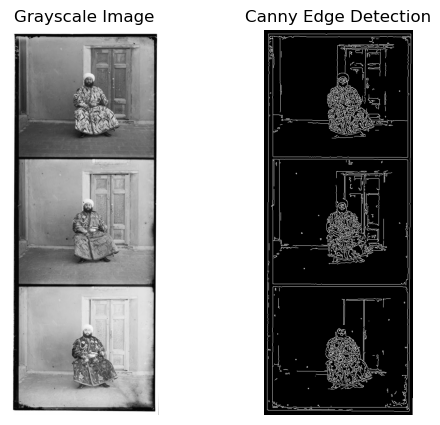

In [ ]:
# Step 2: Find the displacement needed to align RGB channels by following the steps below:
#          (1) [3 pts] Use canny edge detector to find the edges 
# TODO: YOUR CODE

# Canny Edge Detector. Threshold controls edge sensitivity
edges = cv.Canny(img, threshold1=100, threshold2=200)
plt.figure(figsize=(6,5)) # 6 inches wide and 5 inches tall
plt.subplot(1,2,1) # Layout with 1 row and 2 columns, 1: places in left
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,2,2) # (1,2,2-->places in right)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.show()


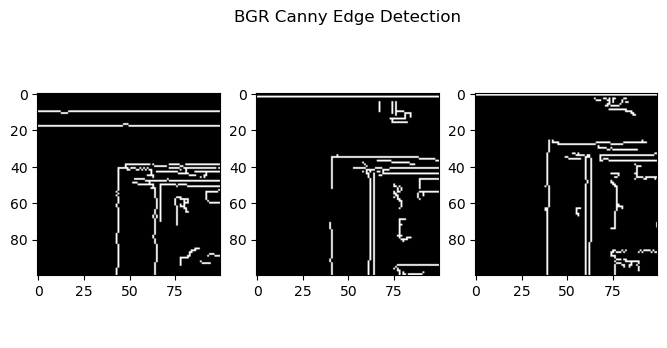

In [ ]:
#         (2) [4 pts] Identify horizontal or vertical edges which could help you find the displacement needed 
#             to align the color channels. You can just write your findings here. 
#             No need to show the code for this section
# TODO: YOUR Findings

b_edges = cv.Canny(b, threshold1=100, threshold2=200)
g_edges = cv.Canny(g, threshold1=100, threshold2=200)
r_edges = cv.Canny(r, threshold1=50, threshold2=100)

plt.figure(figsize=(8,4)) 
plt.axis("off")

plt.title("BGR Canny Edge Detection")
plt.subplot(1,3,1)
plt.imshow(b_edges[0:100, 150:250], cmap='gray')  

plt.subplot(1,3,2)
plt.imshow(g_edges[0:100, 150:250], cmap='gray')  

plt.subplot(1,3,3)
plt.imshow(r_edges[0:100, 150:250], cmap='gray')  

plt.show()


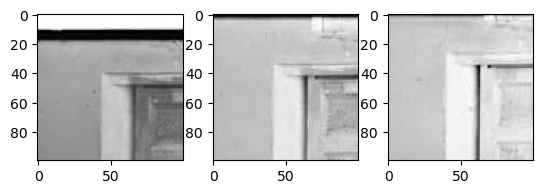

In [30]:
plt.figure()
plt.subplot(2,3,1)
plt.imshow(b[0:100, 150:250], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(g[0:100, 150:250], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(r[0:100, 150:250], cmap='gray')


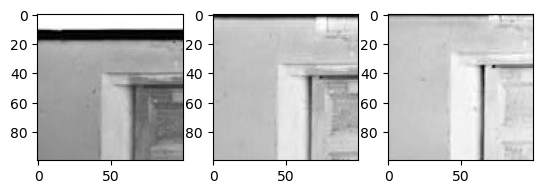

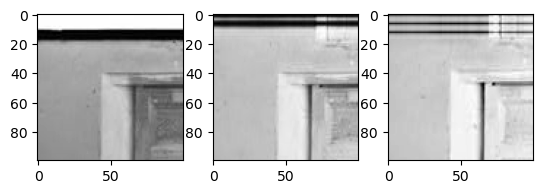

In [29]:
#         (3) [6 pts] Design and apply filters using convolution to align/shift the color channels 
# TODO: YOUR CODE

# Define a 7x7 kernel for filtering
k = np.zeros((7,7))  # Initialize a 7x7 kernel with zeros
k[3,0] = 1  # Set a value to apply directional filtering
# ^ middle row left most cell = 1 for right shift

# Apply the kernel to the green and red channels
g_ = cv.filter2D(g, cv.CV_8U, k)  # Filtered green channel
r_ = cv.filter2D(r, cv.CV_8U, k)  # Filtered red channel
# ^ cv.CV_8U stands for an 8-bit unsigned integer (0-255) data type in OpenCV

plt.figure()
plt.subplot(2,3,1)
plt.imshow(b[0:100, 150:250], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(g_[0:100, 150:250], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(r_[0:100, 150:250], cmap='gray')


k = np.zeros((7,7))
k[0,3] = 1 # ^ top row middle cell = 1 to shift img down
g_ = cv.filter2D(g_, cv.CV_8U, k)
g_ = cv.filter2D(g_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)

plt.figure()
plt.subplot(2,3,4)
plt.imshow(b[0:100, 150:250], cmap='gray')
plt.subplot(2,3,5)
plt.imshow(g_[0:100, 150:250], cmap='gray')
plt.subplot(2,3,6)
plt.imshow(r_[0:100, 150:250], cmap='gray')


#         (4) [2 pts] stacking the channels and display. 
# TODO: YOUR CODE

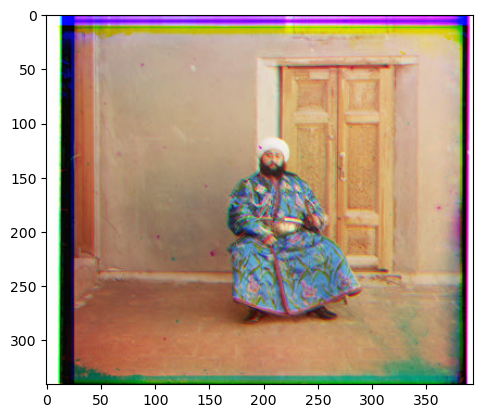

In [32]:
plt.figure()
stacked = np.dstack((b,g_,r_))
plt.imshow(cv.cvtColor(stacked, cv.COLOR_BGR2RGB))